In [10]:
import requests
import zipfile
import numpy as np
import pandas as pd
import datetime
url = 'http://labfile.oss.aliyuncs.com/courses/780/WeatherData.zip'
local_filename = url.split('/')[-1]  
with requests.get(url, stream=True) as r:
    with open(local_filename, 'wb') as f:
        for chunk in r.iter_content(chunk_size=8192):
            f.write(chunk)

with zipfile.ZipFile(local_filename, 'r') as zip_ref:
    zip_ref.extractall('.')
    extracted_files = zip_ref.namelist()

for file in extracted_files:
    print(file)

df_ferrara = pd.read_csv('WeatherData/ferrara_270615.csv')
df_milano = pd.read_csv('WeatherData/milano_270615.csv')
df_mantova = pd.read_csv('WeatherData/mantova_270615.csv')
df_ravenna = pd.read_csv('WeatherData/ravenna_270615.csv')
df_torino = pd.read_csv('WeatherData/torino_270615.csv')
df_asti = pd.read_csv('WeatherData/asti_270615.csv')
df_bologna = pd.read_csv('WeatherData/bologna_270615.csv')
df_piacenza = pd.read_csv('WeatherData/piacenza_270615.csv')
df_cesena = pd.read_csv('WeatherData/cesena_270615.csv')
df_faenza = pd.read_csv('WeatherData/faenza_270615.csv')

WeatherData/
WeatherData/asti_270615.csv
WeatherData/bologna_270615.csv
WeatherData/cesena_270615.csv
WeatherData/faenza_270615.csv
WeatherData/ferrara_270615.csv
WeatherData/mantova_270615.csv
WeatherData/milano_270615.csv
WeatherData/piacenza_270615.csv
WeatherData/ravenna_270615.csv
WeatherData/torino_270615.csv


In [64]:
print(df_asti.head())

   Unnamed: 0   temp  humidity  pressure   description          dt  \
0           0  22.68        60      1018  Sky is Clear  1435390925   
1           1  24.05        60      1018  Sky is Clear  1435394243   
2           2  26.56        57      1018  Sky is Clear  1435399017   
3           3  27.20        57      1017  Sky is Clear  1435402420   
4           4  28.56        29      1017  Sky is Clear  1435406056   

   wind_speed  wind_deg  city                  day  dist  
0        2.10    80.000  Asti  2015-06-27 09:42:05   315  
1        2.60    50.000  Asti  2015-06-27 10:37:23   315  
2        2.10   100.000  Asti  2015-06-27 11:56:57   315  
3        2.10    70.000  Asti  2015-06-27 12:53:40   315  
4        2.06   154.505  Asti  2015-06-27 13:54:16   315  


In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from dateutil import parser
from scipy.optimize import fsolve

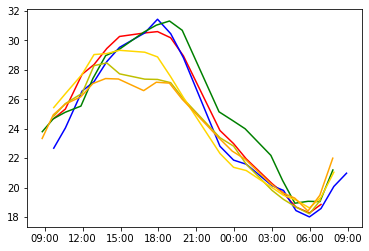

In [29]:
y1 = df_milano['temp']
x1 = df_milano['day']
y2 = df_asti['temp']
x2 = df_asti['day']
y3 = df_torino['temp']
x3 = df_torino['day']
y4 = df_ravenna['temp']
x4 = df_ravenna['day']
y5 = df_faenza['temp']
x5 = df_faenza['day']
y6 = df_cesena['temp']
x6 = df_cesena['day']

day_milano = [parser.parse(x) for x in x1]
day_asti = [parser.parse(x) for x in x2]
day_torino = [parser.parse(x) for x in x3]
day_ravenna = [parser.parse(x) for x in x4]
day_faenza = [parser.parse(x) for x in x5]
day_cesena = [parser.parse(x) for x in x6]


fig, ax = plt.subplots()
hours = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(hours)
ax.plot(day_milano ,y1, 'r',day_asti,y2, 'b', day_torino,y3,'g',day_ravenna,y4,'y',day_faenza,y5,'gold',day_cesena,y6,'orange')

[8, 14, 37, 47, 71, 121, 200, 250, 315, 357]


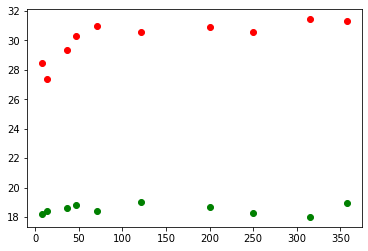

In [30]:
dist = [df_ravenna['dist'][0],
    df_cesena['dist'][0],
    df_faenza['dist'][0],
    df_ferrara['dist'][0],
    df_bologna['dist'][0],
    df_mantova['dist'][0],
    df_piacenza['dist'][0],
    df_milano['dist'][0],
    df_asti['dist'][0],
    df_torino['dist'][0]
]# dist is distance between each city and coast

temp_max = [df_ravenna['temp'].max(),
    df_cesena['temp'].max(),
    df_faenza['temp'].max(),
    df_ferrara['temp'].max(),
    df_bologna['temp'].max(),
    df_mantova['temp'].max(),
    df_piacenza['temp'].max(),
    df_milano['temp'].max(),
    df_asti['temp'].max(),
    df_torino['temp'].max()
]

temp_min = [df_ravenna['temp'].min(),
    df_cesena['temp'].min(),
    df_faenza['temp'].min(),
    df_ferrara['temp'].min(),
    df_bologna['temp'].min(),
    df_mantova['temp'].min(),
    df_piacenza['temp'].min(),
    df_milano['temp'].min(),
    df_asti['temp'].min(),
    df_torino['temp'].min()
]
print(dist)
fig, ax = plt.subplots()
ax.plot(dist,temp_max,'ro')
ax.plot(dist,temp_min,'go')

In [35]:
from sklearn.svm import SVR
dist1 = dist[0:5]
dist2 = dist[5:10]
temp_max1 = temp_max[0:5]
temp_max2 = temp_max[5:10]
svr_lin1 = SVR(kernel='linear', C=1e3)
svr_lin2 = SVR(kernel='linear', C=1e3)
dist1 = [[x] for x in dist1]
dist2 = [[x] for x in dist2]
svr_lin1.fit(dist1, temp_max1)
svr_lin2.fit(dist2, temp_max2)


SVR(C=1000.0, kernel='linear')

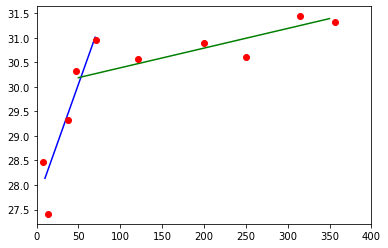

In [36]:
xp1 = np.arange(10,80,10).reshape((7,1))
xp2 = np.arange(50,400,50).reshape((7,1))
yp1 = svr_lin1.predict(xp1)
yp2 = svr_lin2.predict(xp2)
fig, ax = plt.subplots()
ax.set_xlim(0,400)


ax.plot(xp1, yp1, c='b')
ax.plot(xp2, yp2, c='g')
ax.plot(dist,temp_max,'ro')

[53.06985363] [30.20040769]


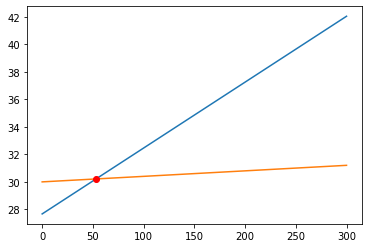

In [40]:
def line1(x):
    a1 = svr_lin1.coef_[0][0]
    b1 = svr_lin1.intercept_[0]
    return a1*x + b1

def line2(x):
    a2 = svr_lin2.coef_[0][0]
    b2 = svr_lin2.intercept_[0]
    return a2*x + b2

def findIntersection(fun1,fun2,x0):
    return fsolve(lambda x : fun1(x) - fun2(x),x0)

result = findIntersection(line1,line2,0.0)
print(result,line1(result))

x = np.linspace(0,300,30)
plt.plot(x,line1(x),x,line2(x),result,line1(result),'ro')

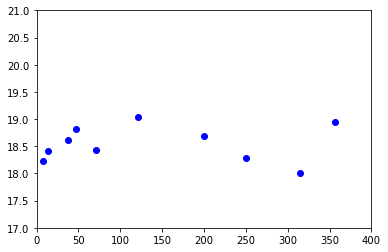

In [55]:
plt.axis((0,400,17,21))
plt.plot(dist,temp_min,'bo')

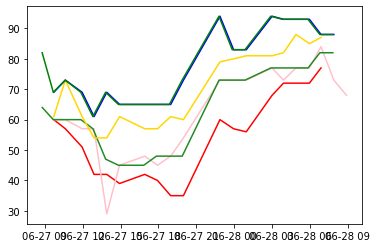

In [68]:
z1 = df_milano['humidity']
z2 = df_asti['humidity']
z3 = df_torino['humidity']
z4 = df_ravenna['humidity']
z5 = df_faenza['humidity']
z6 = df_cesena['humidity']
fig, ax = plt.subplots()
ax.plot(day_milano,z1,'r',day_asti,z2,'pink',day_torino,z3,'forestgreen',day_ravenna,z4,'gold',day_faenza,z5,'b',day_cesena,z6,'g')

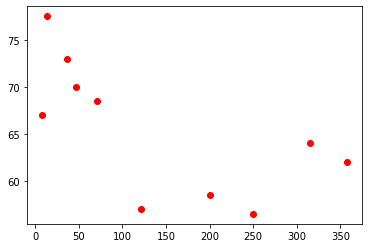

In [73]:
zm = [df_ravenna['humidity'].median(),
df_cesena['humidity'].median(),
df_faenza['humidity'].median(),
df_ferrara['humidity'].median(),
df_bologna['humidity'].median(),
df_mantova['humidity'].median(),
df_piacenza['humidity'].median(),
df_milano['humidity'].median(),
df_asti['humidity'].median(),
df_torino['humidity'].median()]
fig,ax = plt.subplots()
ax.plot(dist,zm,'ro')